In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel("Height-Width.xlsx")
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

Text(0, 0.5, 'Weight')

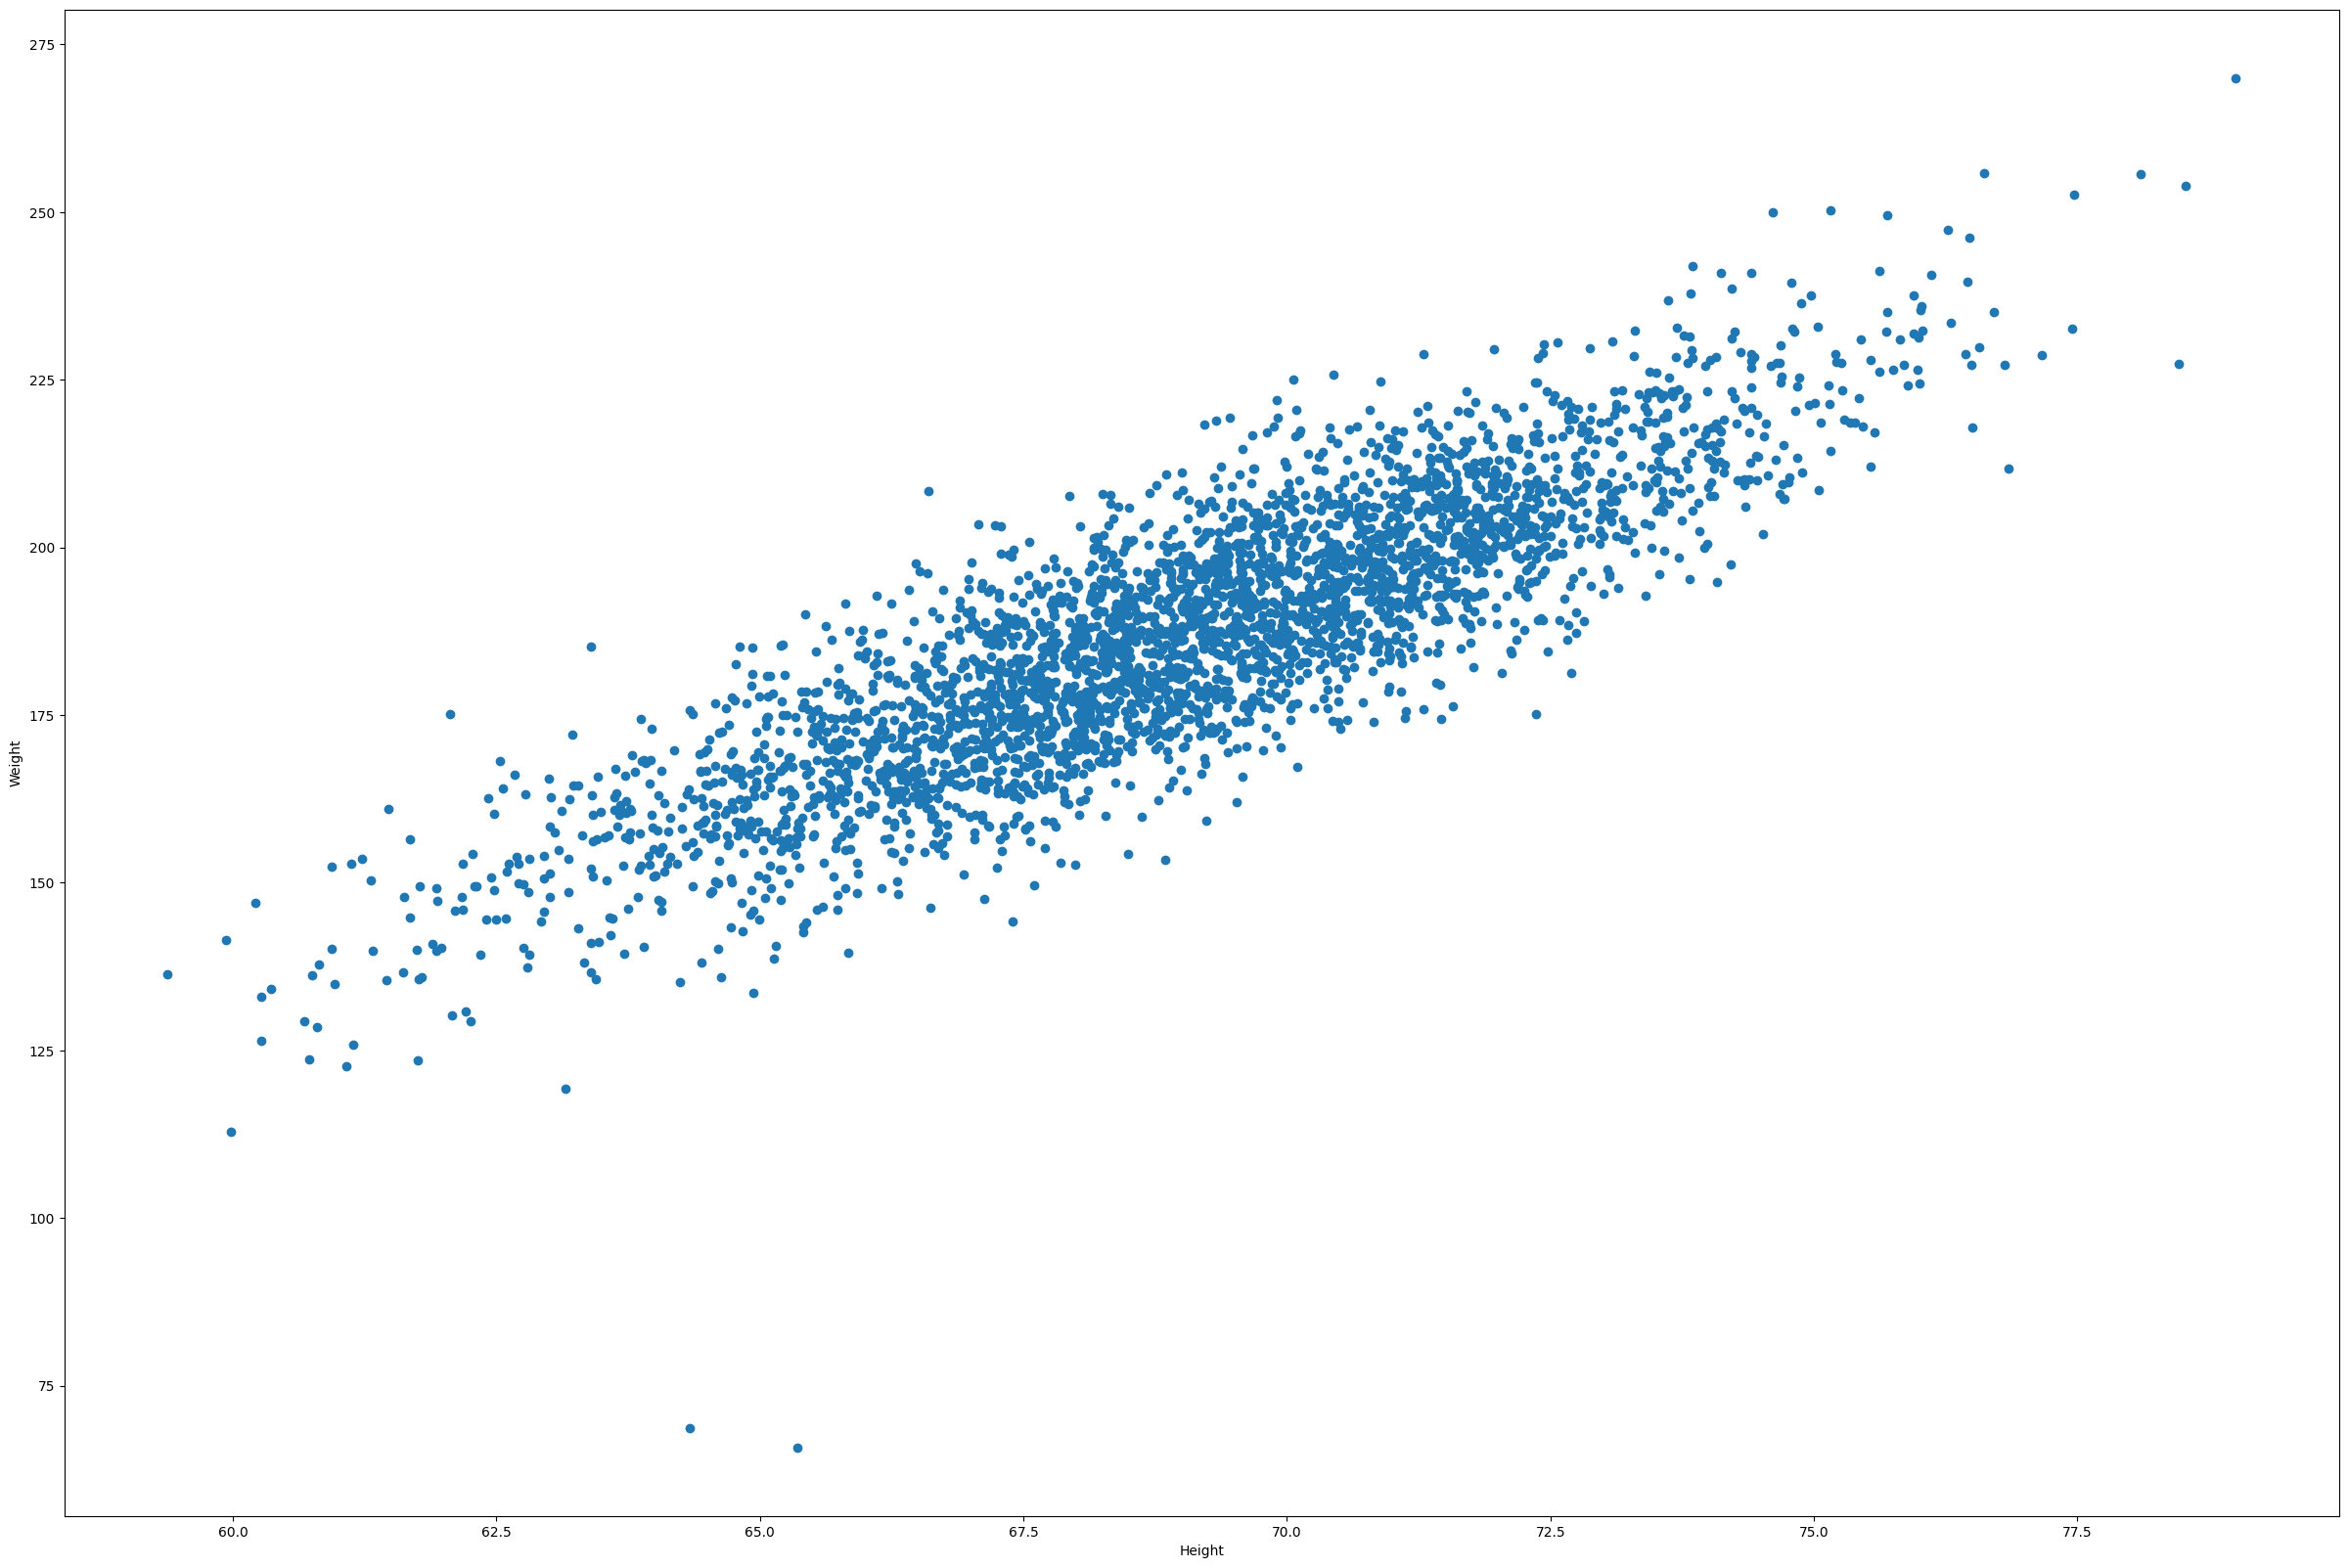

In [11]:
plt.figure(figsize=(30,20))
plt.scatter(df.Height,df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")

In [7]:
y=df["Weight"]
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [12]:
x=df[["Height"]]
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [13]:
from sklearn .model_selection import train_test_split as tts

In [15]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=1)

In [16]:
xtrain


,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


In [17]:
xtest

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902
...,...
236,69.867101
1125,70.280692
1008,72.837685
2169,67.675148


In [18]:
ytrain

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
           ...    
2763    186.208566
905     175.093255
1096    224.440459
235     198.460249
1061    192.307027
Name: Weight, Length: 2450, dtype: float64

In [19]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
236     185.716910
1125    187.258692
1008    212.204040
2169    193.586535
270     200.202829
Name: Weight, Length: 1051, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg=LinearRegression()

In [22]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [24]:
m=reg.coef_
m

array([5.97744946])

In [25]:
c=reg.intercept_
c

-225.8260300075584

In [26]:
y=m*70.171479+c
y

array([193.62043937])

In [27]:
reg.predict([[70.171479]])

C:\Users\AC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([193.62043937])

In [28]:
pred=reg.predict(xtest)
pred

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [29]:
df["Predicted Result"]=reg.predict(x)
df

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
...,...,...,...
3496,69.296830,185.649086,188.392269
3497,70.542201,210.198845,195.836414
3498,73.912549,202.429960,215.982497
3499,67.396021,144.277671,177.030278


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
mse=mean_squared_error(ytest,pred)

In [34]:
mse

110.8922151693238

In [37]:
mae=mean_absolute_error(ytest,pred)
mae

8.279688660993672

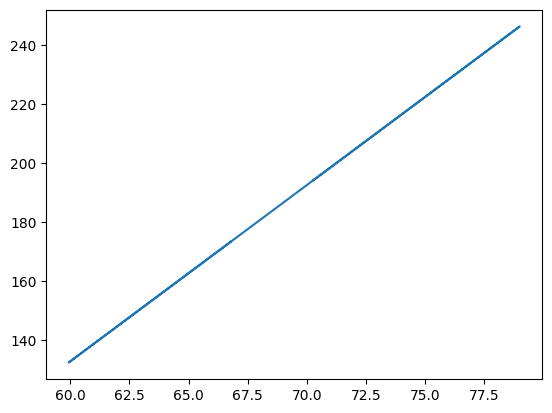

In [38]:
plt.plot(xtrain,reg.predict(xtrain))

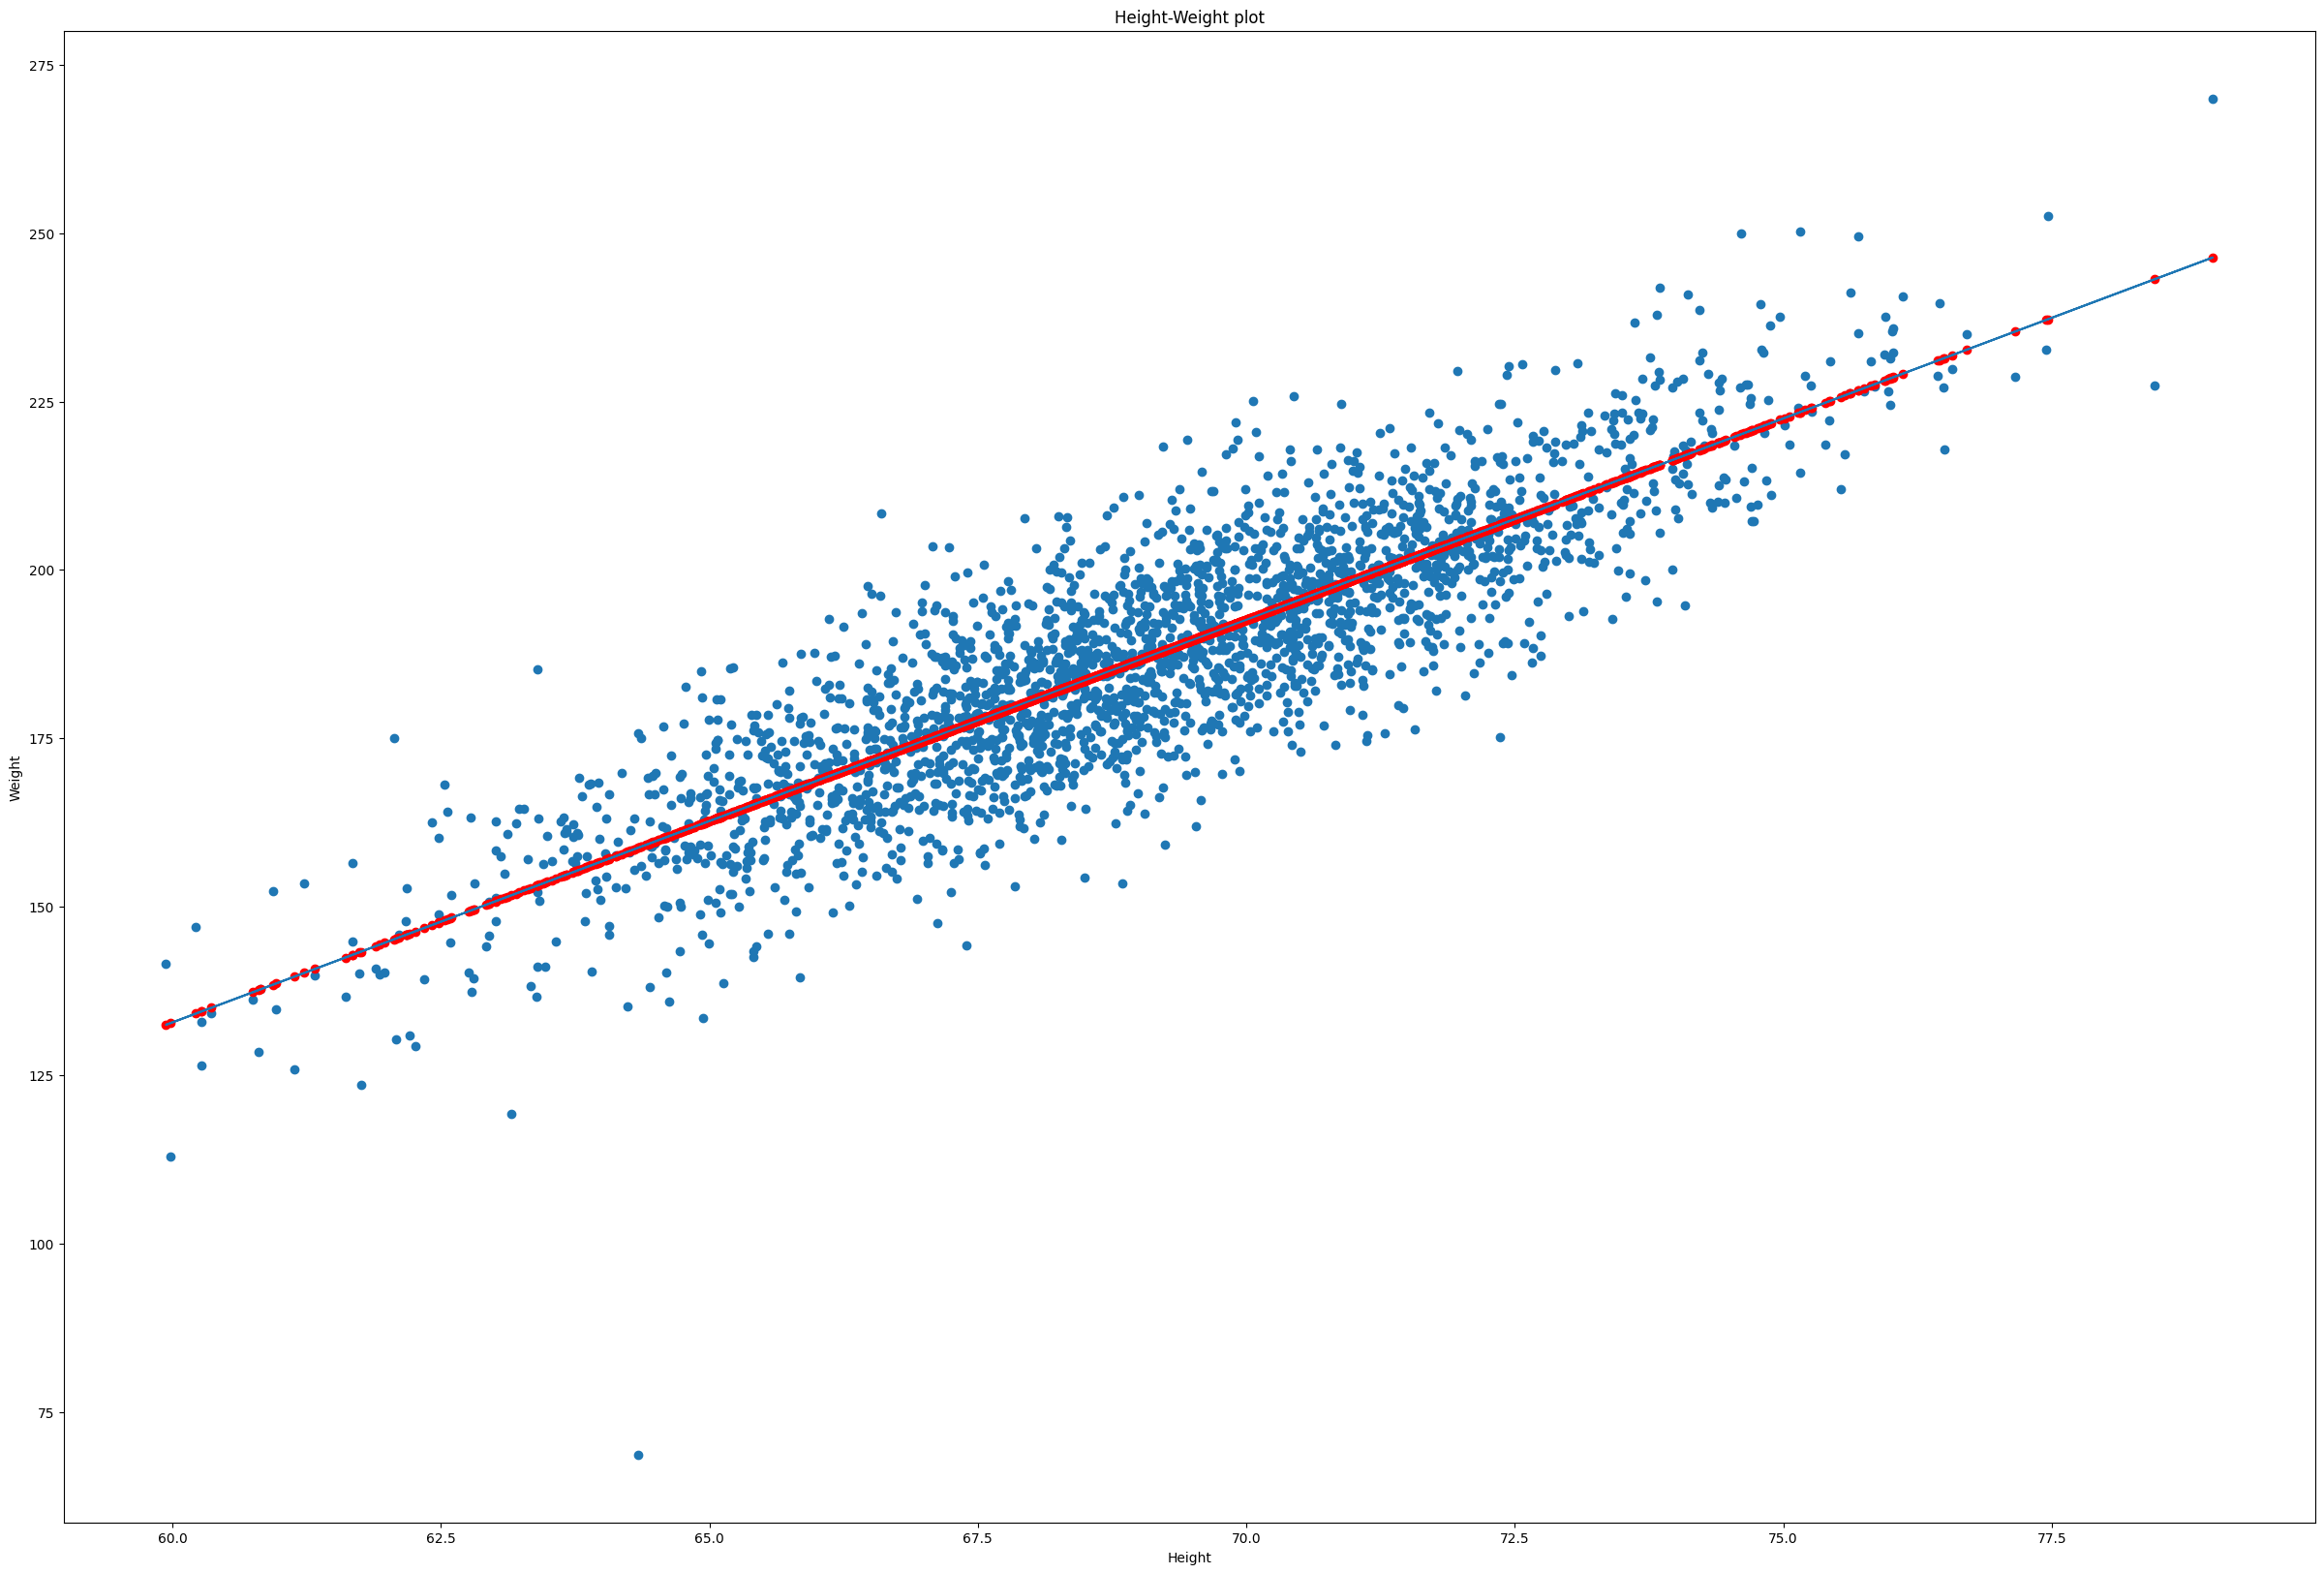

In [39]:
plt.figure(figsize=(30,20))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="Red")

In [40]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7313258168853622

In [41]:
xtest.to_csv("xtest.csv")

In [42]:
xtest

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902
...,...
236,69.867101
1125,70.280692
1008,72.837685
2169,67.675148


In [43]:
import pickle as pk
import joblib as jb

In [44]:
pk.dump(reg,open("first","wb"))

In [45]:
reg2=pk.load(open("first","rb"))

In [48]:
reg2.predict([[70.171479]])

C:\Users\AC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([193.62043937])

In [50]:
jb.dump(reg,"second")

['second']